# Exploratory Data Analysis

### Import Data

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [65]:
df = pd.read_csv('cleaned_terry_stop_for_eda.csv')
dforig = pd.read_csv('Terry_Stops.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

subject_age_group  subject_id       go_sc_num  terry_stop_id weapon_type  \
0             26_35  unassigned  20140000120677          92317        None   
1             26_35  unassigned  20150000001463          28806        None   
2             26_35  unassigned  20150000001516          29599        None   
3             26_35  unassigned  20150000001670          32260        None   
4             26_35  unassigned  20150000001739          33155        None   

   officer_yob officer_gender               officer_race  \
0         1984              M  Black or African American   
1         1965              M                      White   
2         1961              M                      White   
3         1963              M                      White   
4         1977              M                      White   

      subject_perceived_race subject_perceived_gender  ... officer_age  \
0                      Asian                        M  ...          31   
1              Not Specified      Unable to Determine  ...          50   
2                      White                        M  ...          54   
3              Not Specified      Unable to Determine  ...          52   
4  Black or African American                        M  ...          38   

  reported_hour call_made dif_race dif_gender dif_race_gender 12am_6am  \
0            11         0        Y          N               Y        0   
1             7         0        Y          Y               Y        0   
2            19         0        N          N               N        0   
3             4         0        Y          Y               Y        1   
4             0         0        Y          N               Y        1   

  7am_12pm 1pm_6pm 7pm_11pm  
0        1       0        0  
1        1       0        0  
2        0       0        1  
3        0       0        0  
4        0       0        0  

[5 rows x 33 columns]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44750 entries, 0 to 44749
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44750 non-null  object
 1   subject_id                44750 non-null  object
 2   go_sc_num                 44750 non-null  int64 
 3   terry_stop_id             44750 non-null  int64 
 4   weapon_type               44750 non-null  object
 5   officer_yob               44750 non-null  int64 
 6   officer_gender            44750 non-null  object
 7   officer_race              44750 non-null  object
 8   subject_perceived_race    44750 non-null  object
 9   subject_perceived_gender  44750 non-null  object
 10  initial_call_type         44750 non-null  object
 11  final_call_type           44750 non-null  object
 12  officer_squad             44203 non-null  object
 13  arrest_flag               44750 non-null  object
 14  frisk_flag            

In [25]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [26]:
from pandas_profiling import ProfileReport

In [27]:
profile = ProfileReport (df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

In [44]:
for col in df.columns:
    df[col] = df[col].astype('category')

### 1. Is there a relationship with Race and being stopped?

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Asian'),
  Text(1, 0, 'Black or African American'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Multi-Racial'),
  Text(4, 0, 'Native American'),
  Text(5, 0, 'Not Specified'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'White')])

<Figure size 1440x1224 with 0 Axes>

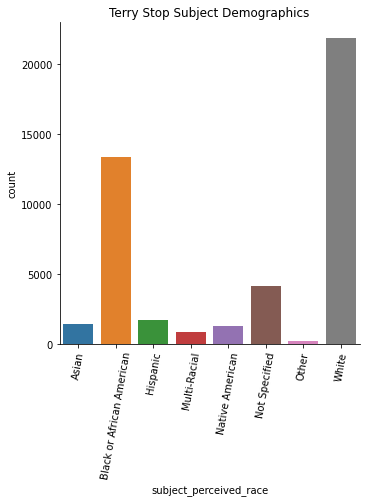

In [50]:
fig = plt.gcf() # Gets a reference to the current figure when using pyplot. Similar to figure()
fig.set_size_inches(20, 17) # Sets size of the plot
sns.catplot(x= 'subject_perceived_race', kind='count', data=df) # Plots a countplot- a histogram across categorical variables
plt.title("Terry Stop Subject Demographics")
plt.xticks(rotation=80) #Rotate x-labels so that the labels do not overlap

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Asian'),
  Text(1, 0, 'Black or African American'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Multi-Racial'),
  Text(4, 0, 'Native American'),
  Text(5, 0, 'Not Specified'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'White')])

<Figure size 1440x1224 with 0 Axes>

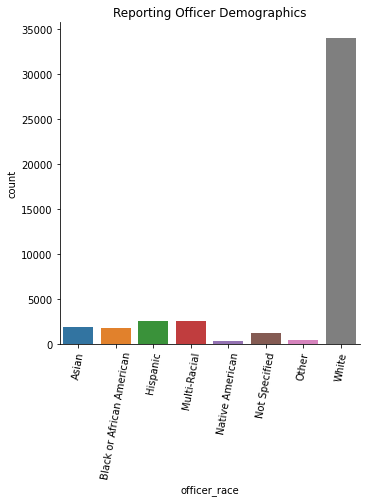

In [51]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'officer_race', kind='count', data=df)
plt.title("Reporting Officer Demographics")
plt.xticks(rotation=80)

### Seattle Demographics according to seattle.gov (2014-2018)

Race/ethnicity:

**White** - 64.5% (+/- 0.4 percentage pts.)

**Black or African American** - 6.8% (+/- 0.3 percentage pts.)

**American Indian & Alaska Native** - 0.5% (+/- 0.1 percentage pts.)

**Asian** - 14.9% (+/- 0.4 percentage pts.)

**Native Hawaiian & Other Pacific Islander** - 0.3% (+/- 0.1 percentage pts.)

**Other race** - 0.3% (+/- 0.1 percentage pts.)

**Two or more races** - 6.0% (+/- 0.2 percentage pts.)

**Hispanic or Latino ethnicity (of any race)**: 6.6% (+/- 0.3 percentage pts.)


The populations for those years were:

2014 : 670,925

2015: 688,156

2016: 710,510

2017: 729,601

2018: 744,955



**Findings:** 
Seattle is about 65% White and 7% Black. But make up about 33% of those being stopped

### Does The Difference In Race Between Officer and Subject Play A Role?

<Figure size 1440x1224 with 0 Axes>

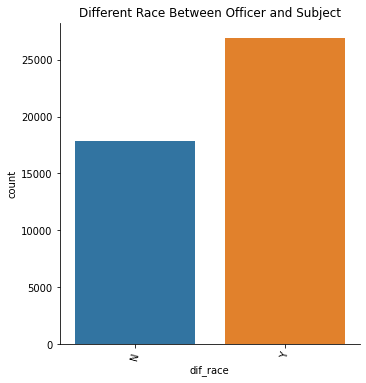

In [53]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'dif_race', kind='count', data=df)
plt.title("Different Race Between Officer and Subject")
plt.xticks(rotation=75)
plt.show()

In [54]:
df.dif_race.value_counts()

Y    26906
N    17844
Name: dif_race, dtype: int64

**Findings:**
    According to the data, an officer is 1.5 times likely to have a different race from that
    of the person being detained.

In [55]:
# create a column to allow for catagory counting
df['count'] = 1

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44750 entries, 0 to 44749
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   subject_age_group         44750 non-null  category
 1   subject_id                44750 non-null  category
 2   go_sc_num                 44750 non-null  category
 3   terry_stop_id             44750 non-null  category
 4   weapon_type               44750 non-null  category
 5   officer_yob               44750 non-null  category
 6   officer_gender            44750 non-null  category
 7   officer_race              44750 non-null  category
 8   subject_perceived_race    44750 non-null  category
 9   subject_perceived_gender  44750 non-null  category
 10  initial_call_type         44750 non-null  category
 11  final_call_type           44750 non-null  category
 12  officer_squad             44203 non-null  category
 13  arrest_flag               44750 non-null  cate

### Is there a correlation between frisks and arrests? 

In [68]:
dforig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44838 entries, 0 to 44837
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         44838 non-null  object
 1   Subject ID                44838 non-null  int64 
 2   GO / SC Num               44838 non-null  int64 
 3   Terry Stop ID             44838 non-null  int64 
 4   Stop Resolution           44838 non-null  object
 5   Weapon Type               44838 non-null  object
 6   Officer ID                44838 non-null  object
 7   Officer YOB               44838 non-null  int64 
 8   Officer Gender            44838 non-null  object
 9   Officer Race              44838 non-null  object
 10  Subject Perceived Race    44838 non-null  object
 11  Subject Perceived Gender  44838 non-null  object
 12  Reported Date             44838 non-null  object
 13  Reported Time             44838 non-null  object
 14  Initial Call Type     

In [70]:
dforig.columns = ['subject_age_group', 'subject_id', 'go_sc_num', 'terry_stop_id',
       'stop_resolution', 'weapon_type', 'officer_id', 'officer_yob',
       'officer_gender', 'officer_race', 'subject_perceived_race',
       'subject_perceived_gender', 'reported_date', 'reported_time',
       'initial_call_type', 'final_call_type', 'call_type', 'officer_squad',
       'arrest_flag', 'frisk_flag', 'precinct', 'sector', 'beat']
dforig.columns

Index(['subject_age_group', 'subject_id', 'go_sc_num', 'terry_stop_id',
       'stop_resolution', 'weapon_type', 'officer_id', 'officer_yob',
       'officer_gender', 'officer_race', 'subject_perceived_race',
       'subject_perceived_gender', 'reported_date', 'reported_time',
       'initial_call_type', 'final_call_type', 'call_type', 'officer_squad',
       'arrest_flag', 'frisk_flag', 'precinct', 'sector', 'beat'],
      dtype='object')

In [72]:
def seaborn_barplot(x=None, y=None, figsize=(13,8), data=None, xlabel=None, 
                    ylabel=None, title=None):
    """
    Input: Basic parameters for a Seaborn Bar Plot
    Output: A basic bar plot
    """
    fig = plt.figure(figsize=figsize)
    sns.set_style('darkgrid')

    sns.barplot(x=x, y=y, data=data)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title,
         fontsize=20)

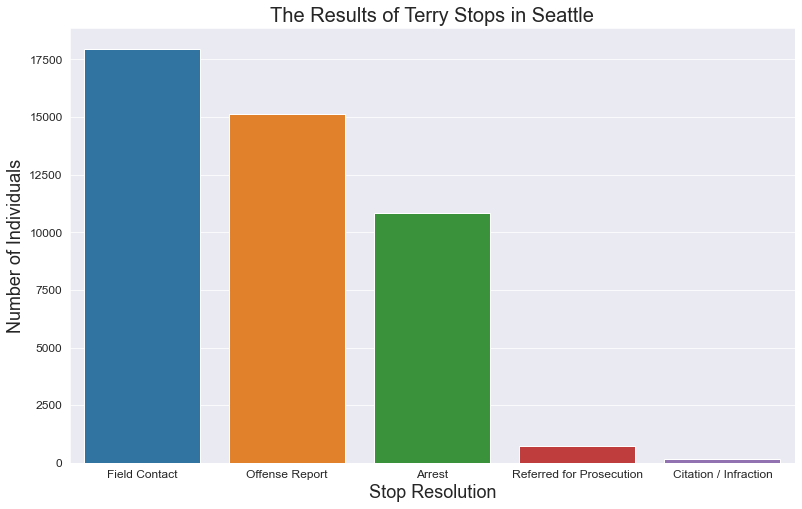

In [73]:
x = dforig['stop_resolution'].value_counts().index
y = dforig.stop_resolution.value_counts()

seaborn_barplot(x=x, y=y, xlabel='Stop Resolution', 
                ylabel='Number of Individuals', 
                title=('The Results of Terry Stops in Seattle'))

Drop Offense Report since this is just associated with interviewing witnesses and obtaining information from victims

In [75]:
no_reports = dforig[dforig['stop_resolution'] != 'Offense Report']

arrests = 0
frisks = 0
# filter out people who were frisked during an arrest
frisked_arrested = 0
for i in range(len(no_reports)):
    if no_reports.arrest_flag.iloc[i] == 'Y' and no_reports.frisk_flag.iloc[i] == 'N':
        arrests += 1
    elif no_reports.arrest_flag.iloc[i] == 'N' and no_reports.frisk_flag.iloc[i] == 'Y':
        frisks += 1
    elif no_reports.arrest_flag.iloc[i] == 'Y' and no_reports.frisk_flag.iloc[i] == 'Y':
        frisked_arrested += 1
        
gap = frisks - frisked_arrested

In [76]:
print(f'Arrests = {arrests}', f' Frisk Searches = {frisks}', 
      f'Frisked and Arrested = {frisked_arrested}', f'"The Gap" = {gap}')

Arrests = 1800  Frisk Searches = 5571 Frisked and Arrested = 835 "The Gap" = 4736


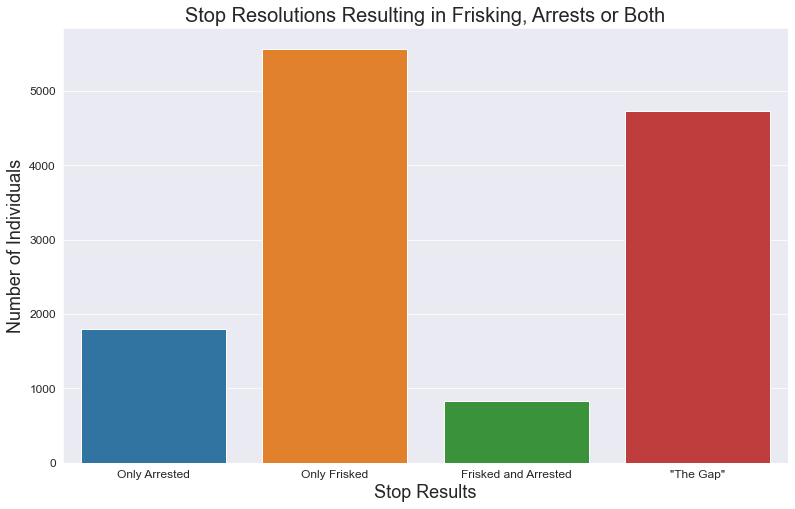

In [77]:
# The relationship of frisks to arrests
x = ['Only Arrested', 'Only Frisked', 'Frisked and Arrested', '"The Gap"']
y = [arrests, frisks, frisked_arrested, gap]

seaborn_barplot(x=x, y=y, xlabel='Stop Results', 
                ylabel='Number of Individuals', 
                title=('Stop Resolutions Resulting in' + 
                       ' Frisking, Arrests or Both'))

**Results:**  There were many more people that were only frisked than those that were frisked and arrested; this causes a large 'Gap'.  The policy of frisking people may want to be addressed since we can see that a large proportion do not lead to arrest. This can cause a distrust of officers by the population leading them to conclude that this policy can be harassment. 